In [1]:
import pandas as pd
import numpy as np
import statsmodels.stats as st
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option("display.max_columns",None)
%matplotlib inline

In [2]:
data = pd.read_csv("Cleaned_data.csv")

In [3]:
df = data.copy()
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,2.6,9.1,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,8.0,8.1,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,8.0,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,7.8,11.3,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,0.0,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.0,12.8,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,1.0,3.0,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,2.6,11.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        142193 non-null  float64
 3   MaxTemp        142193 non-null  float64
 4   Rainfall       142193 non-null  float64
 5   Evaporation    142193 non-null  float64
 6   Sunshine       142193 non-null  float64
 7   WindGustDir    142193 non-null  object 
 8   WindGustSpeed  142193 non-null  float64
 9   WindDir9am     142193 non-null  object 
 10  WindDir3pm     142193 non-null  object 
 11  WindSpeed9am   142193 non-null  float64
 12  WindSpeed3pm   142193 non-null  float64
 13  Humidity9am    142193 non-null  float64
 14  Humidity3pm    142193 non-null  float64
 15  Pressure9am    142193 non-null  float64
 16  Pressure3pm    142193 non-null  float64
 17  Cloud9am       142193 non-nul

## FEATURE ENGINEERING

We will be adding Months from the 'Date' feature in our dataset, as with every month season changes and chances of rainfall is related with the change in season.

In [5]:
df["Month"] = pd.to_datetime(df["Date"]).dt.month
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Month
0,2008-12-01,Albury,13.4,22.9,0.6,2.6,9.1,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,No,0.0,No,12
1,2008-12-02,Albury,7.4,25.1,0.0,8.0,8.1,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,8.0,17.2,24.3,No,0.0,No,12
2,2008-12-03,Albury,12.9,25.7,0.0,7.8,11.3,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,0.0,2.0,21.0,23.2,No,0.0,No,12
3,2008-12-04,Albury,9.2,28.0,0.0,5.0,12.8,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,1.0,3.0,18.1,26.5,No,1.0,No,12
4,2008-12-05,Albury,17.5,32.3,1.0,2.6,11.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No,12


Now let us look at our categorical features.

In [6]:
cat = [i for i in df.select_dtypes('object')]
cat

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

We have already used 'Date' to make a 'Month' column, so we can drop this feature from our dataset.

In [7]:
df.drop('Date', axis = 1, inplace = True)

In [8]:
cat = [i for i in df.select_dtypes('object')]
cat

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

Let us look at the no. of unique values in each categorical feature.

In [9]:
for i in cat:
    print(i,":%d"%df[i].nunique())

Location :49
WindGustDir :16
WindDir9am :16
WindDir3pm :16
RainToday :2
RainTomorrow :2


Now if we perfom a one hot encoding on the categorical features, it would create a large no. of columns thus increasing the dimension of our dataset. We will try to reduce the no. of columns

As we know that Month, Wind Direction are cyclic variables. We can transform the categorical label of these features to a continous values using cyclic transformation with the help of sine and cosine.

In [10]:
df['Month_Sin'] = np.sin((df['Month'])*(2.*np.pi/12))
df['Month_Cos'] = np.cos((df['Month'])*(2.*np.pi/12))

<AxesSubplot:xlabel='Month_Sin', ylabel='Month_Cos'>

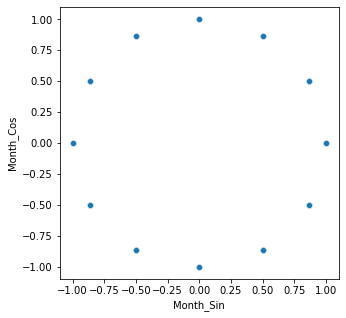

In [11]:
plt.figure(figsize = (5,5))
sns.scatterplot(df['Month_Sin'],df['Month_Cos'])

In [12]:
wind_dict = {'N':1,'NNW':2,'NW':3,'WNW':4,
             'W':5,'WSW':6,'SW':7,'SSW':8,
             'S':9,'SSE':10,'SE':11,'ESE':12,
             'E':13,'ENE':14,'NE':15,'NNE':16}

df['WindGustDir'] = df['WindGustDir'].map(wind_dict)
df['WindDir3pm'] = df['WindDir3pm'].map(wind_dict)
df['WindDir9am'] = df['WindDir9am'].map(wind_dict)

df['WindGustDir_sin'] = np.sin((df['WindGustDir'])*(2*np.pi/16))
df['WindGustDir_cos'] = np.cos((df['WindGustDir'])*(2*np.pi/16))

df['WindDir9am_sin'] = np.sin((df['WindDir9am'])*(2*np.pi/16))
df['WindDir9am_cos'] = np.cos((df['WindDir9am'])*(2*np.pi/16))

df['WindDir3pm_sin'] = np.sin((df['WindDir3pm'])*(2*np.pi/16))
df['WindDir3pm_cos'] = np.cos((df['WindDir3pm'])*(2*np.pi/16))

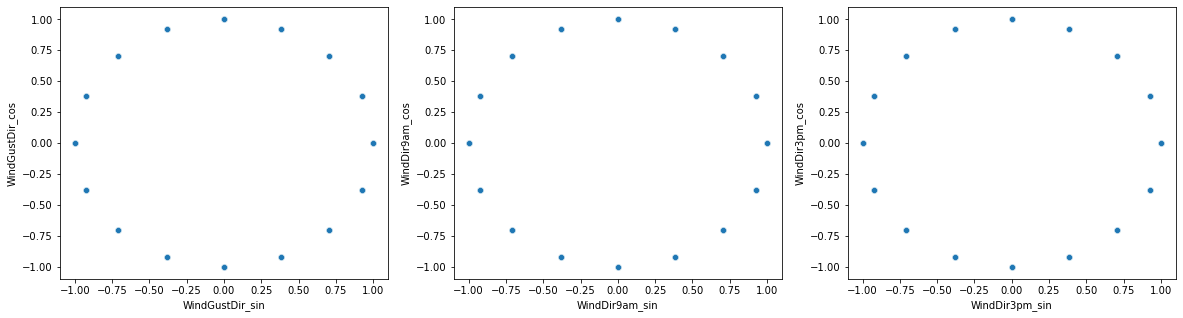

In [13]:
plt.figure(figsize = (20,5))
plt.subplot(1,3,1)
sns.scatterplot(df['WindGustDir_sin'],df['WindGustDir_cos'])

plt.subplot(1,3,2)
sns.scatterplot(df['WindDir9am_sin'],df['WindDir9am_cos'])

plt.subplot(1,3,3)
sns.scatterplot(df['WindDir3pm_sin'],df['WindDir3pm_cos'])

plt.show()

Now we can drop 'Month','WindGustDir','WindDir9am' and 'WindDir3pm' features from our dataset

In [14]:
df.drop(['Month','WindGustDir','WindDir9am','WindDir3pm'], axis = 1, inplace = True)

### The Case of 'RISK_MM'

RISK_MM is the amount of rainfall in millimeters for the next day. It includes all forms of precipitation that reach the ground, such as rain, drizzle, hail and snow. And it was the column that was used to actually determine whether or not it rained to create the binary target. Since it contains information directly about the target variable, including it would leak the future information to our model. So we will have to drop this feature.

In [15]:
df.drop('RISK_MM', axis = 1, inplace = True)

Mapping the 'Yes' and 'No' in 'RainToday' and 'RainTomorrow' with 1 and 0 respectively.

In [16]:
df['RainToday'] = df['RainToday'].map({'Yes':1,'No':0})
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes':1,'No':0})

Now, for the train-test split we will try to have equal proportion of data with respect to the 'location' and 'RainTomorrow' feature in both the train and test set. For that we will create one new Feature that will contatin infromation about both 'Location' and 'RainTomorrow' variable and then pass this feature in the stratify parameter of the train test split. 

In [17]:
df['Location_y'] = df['Location'] + df['RainTomorrow'].astype("str")
df['Location_y'].head()

0    Albury0
1    Albury0
2    Albury0
3    Albury0
4    Albury0
Name: Location_y, dtype: object

In [18]:
X = df.drop('RainTomorrow', axis = 1)
y = df['RainTomorrow']

## MODEL FITTING

In [19]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score,f1_score,roc_curve,roc_auc_score

In [20]:
def fit_model (model, X_train, y_train, X_test, y_test):
    '''Fits the passed model to the train set and 
    generates a detailed classification report with plots'''
    
    model.fit(X_train,y_train)
    
    y_pred = model.predict(X_test)
    
    print("Precision: %0.4f"%precision_score(y_test,y_pred))
    print("Recall:    %0.4f"%recall_score(y_test,y_pred))
    print("F1 Score:  %0.4f"%f1_score(y_test,y_pred))
    print("\n\nCONFUSION MATRIX:\n")
    print(confusion_matrix(y_test,y_pred))
    print("\n\nCLASSIFICATION REPORT\n")
    print(classification_report(y_test,y_pred))
    
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.plot(fpr, tpr, label="ROC Curve")
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()
    
    print("AUC Score: %0.4f"%roc_auc_score(y_test,model.predict_proba(X_test)[:,1]))
    
    return model

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify = df['Location_y'],test_size = 0.33,random_state=42)

In [22]:
proportion = pd.DataFrame(columns = ['Location_y','Train_proportion', 'Test_proportion'])

for i in df['Location_y'].unique():
    tr = (X_train[X_train['Location_y']==i].shape[0]/X_train.shape[0])
    te = (X_test[X_test['Location_y']==i].shape[0]/X_test.shape[0])
    proportion = proportion.append({'Location_y':i,'Train_proportion':tr,'Test_proportion':te}, ignore_index = True)

proportion

,Location_y,Train_proportion,Test_proportion
0,Albury0,0.016826,0.016836
1,Albury1,0.004346,0.004347
2,BadgerysCreek0,0.016490,0.016495
3,BadgerysCreek1,0.004104,0.004092
4,Cobar0,0.018296,0.018306
...,...,...,...
93,Darwin1,0.005994,0.005988
94,Katherine0,0.009101,0.009100
95,Katherine1,0.001868,0.001854
96,Uluru0,0.009877,0.009888


Now, we don't need our "Location_y" feature so we will drop it from train and test set.

In [23]:
X_train.drop('Location_y', axis = 1, inplace = True)
X_test.drop('Location_y', axis = 1, inplace = True)

In [24]:
#Perfoming One Hot Encoding on X_train and X_test.

print("No. of features before One Hot Encoding: ",X_train.shape[1])
X_train = pd.get_dummies(X_train, drop_first = True)
X_test = pd.get_dummies(X_test, drop_first = True)
print('No. of features after performing One-Hot Encoding: ', X_train.shape[1])

X_dummies = X_train.copy()
features = list(X_train.columns)

No. of features before One Hot Encoding:  26
No. of features after performing One-Hot Encoding:  73


In [40]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Logistic Regression

### Base Model:

Base Logistic: 

Precision: 0.7318
Recall:    0.4960
F1 Score:  0.5912


CONFUSION MATRIX:

[[34495  1912]
 [ 5301  5216]]


CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     36407
           1       0.73      0.50      0.59     10517

    accuracy                           0.85     46924
   macro avg       0.80      0.72      0.75     46924
weighted avg       0.84      0.85      0.83     46924



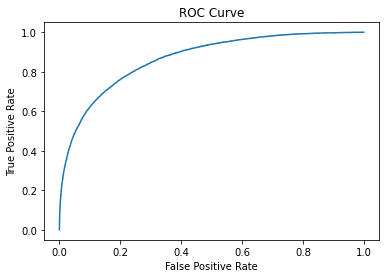

AUC Score: 0.8664


In [41]:
print("Base Logistic: \n")
log_base = fit_model(LogisticRegression(penalty = 'none'),X_train,y_train,X_test,y_test)

Plotting the coefficients of the features

In [42]:
coeff = pd.DataFrame()

for (i,j) in zip(features,list(np.ravel(log_base.coef_))):
    coeff = coeff.append({'Features':i,'Log_base':j}, ignore_index = True)

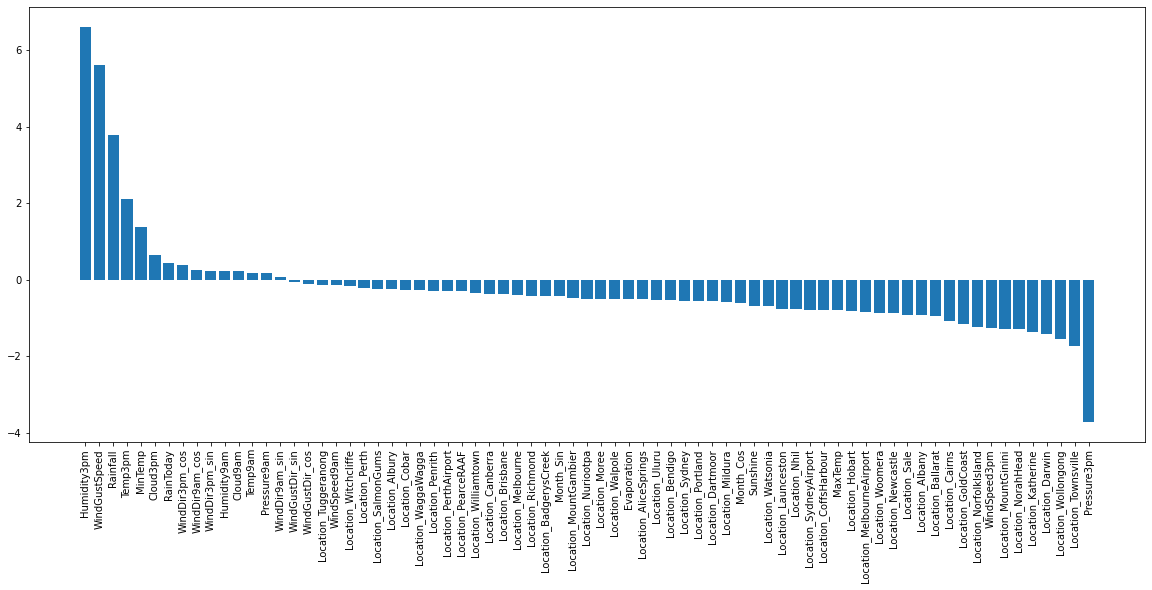

In [43]:
b = coeff.sort_values(by='Log_base',ascending=False)

plt.figure(figsize=(20,8))
plt.bar(height = b['Log_base'], x = b['Features'])
plt.xticks(rotation=90)
plt.show()

In [44]:
b

,Features,Log_base
9,Humidity3pm,6.610136
5,WindGustSpeed,5.598771
2,Rainfall,3.788259
15,Temp3pm,2.108134
0,MinTemp,1.372718
...,...,...
40,Location_Katherine,-1.375070
37,Location_Darwin,-1.427200
71,Location_Wollongong,-1.555084
63,Location_Townsville,-1.734271


Humidity3pm, WindGustSpeed, Rainfall, Temp3m are among some of the important features of the model.

In [45]:
logit_base = sm.Logit(y_train,sm.add_constant(X_train)).fit()

Optimization terminated successfully.
         Current function value: 0.360127
         Iterations 7


In [46]:
logit_base.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           RainTomorrow   No. Observations:                95269
Model:                          Logit   Df Residuals:                    95195
Method:                           MLE   Df Model:                           73
Date:                Thu, 26 Aug 2021   Pseudo R-squ.:                  0.3233
Time:                        14:23:05   Log-Likelihood:                -34309.
converged:                       True   LL-Null:                       -50700.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.2816      0.173    -30.507      0.000      -5.621      -4.942
x1             1.3805      0.233      5.934      0.000       0.925       1.836
x2            -1.2980      0.421     -3.087      0.002      -2.122      -0.474
x3             3.5925      0.480      7.486      0.000       2.652       4.533
x4            -0.4529      0.387     -1.172      0.241      -1.210       0.305
x5            -0.6977      0.040    -17.412      0.000      -0.776      -0.619
x6             5.6494      0.133     42.575      0.000       5.389       5.909
x7            -0.2779      0.199     -1.394      0.163      -0.669       0.113
x8            -1.2649      0.129     -9.770      0.000      -1.519      -1.011
x9             0.2278      0.111      2.050      0.040       0.010       0.446
x10            6.6068      0.117     56.347      0.000       6.377       6.837
x11            0.1383      0.171      0.807      0.419      -0.197       0.474
x12           -3.6970      0.172    -21.483      0.000      -4.034      -3.360
x13            0.2218      0.032      6.988      0.000       0.160       0.284
x14            0.6587      0.033     19.769      0.000       0.593       0.724
x15            0.3359      0.375      0.896      0.370      -0.399       1.070
x16            2.4873      0.457      5.443      0.000       1.592       3.383
x17            0.4281      0.026     16.423      0.000       0.377       0.479
x18           -0.4439      0.038    -11.720      0.000      -0.518      -0.370
x19           -0.6203      0.044    -13.993      0.000      -0.707      -0.533
x20           -0.0635      0.039     -1.627      0.104      -0.140       0.013
x21           -0.1191      0.037     -3.181      0.001      -0.192      -0.046
x22            0.0642      0.035      1.815      0.069      -0.005       0.134
x23            0.2488      0.035      7.152      0.000       0.181       0.317
x24            0.2282      0.041      5.607      0.000       0.148       0.308
x25            0.3714      0.040      9.323      0.000       0.293       0.449
x26           -0.9462      0.088    -10.741      0.000      -1.119      -0.774
x27           -0.2573      0.099     -2.593      0.010      -0.452      -0.063
x28           -0.5341      0.127     -4.213      0.000      -0.783      -0.286
x29           -0.4526      0.097     -4.678      0.000      -0.642      -0.263
x30           -0.9351      0.100     -9.320      0.000      -1.132      -0.738
x31           -0.5465      0.102     -5.377      0.000      -0.746      -0.347
x32           -0.4025      0.096     -4.187      0.000      -0.591      -0.214
x33           -1.1156      0.100    -11.194      0.000      -1.311      -0.920
x34           -0.3772      0.098     -3.843      0.000      -0.570      -0.185
x35           -0.2894      0.110     -2.631      0.009      -0.505      -0.074
x36           -0.8198      0.094     -8.715      0.000      -1.004      -0.635
x37           -0.5747      0.093     -6.156      0.000      -0.758      -0.392
x3

In [47]:
insignificant = np.ravel(np.where(logit_base.pvalues>0.05))

print("The insignificant features are:\n")
for i in (insignificant-1):
    print(features[i])

The insignificant features are:

Evaporation
WindSpeed9am
Pressure9am
Temp9am
WindGustDir_sin
WindDir9am_sin
Location_Tuggeranong


__*Now let us fix the class imbalance problem then try to fit a model.*__

0    77.58
1    22.42
Name: RainTomorrow, dtype: float64


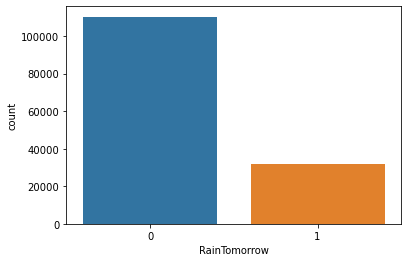

In [48]:
print(round((y.value_counts()/y.shape[0])*100,2))

sns.countplot(y)
plt.show()

In our target feature, the no. of 'No' instances (77.58%) is far greater than the no. of 'Yes' instances (22.42%). This is clearly a case of class imbalance. To solve this we will apply two resampling techniques.

1) Combination of UnderSampling and OverSampling

2) SMOTE

In [49]:
from imblearn.over_sampling import RandomOverSampler, SMOTE 
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

### 1) Combination of UnderSampling and OverSampling

In [50]:
under = RandomUnderSampler(sampling_strategy=0.5)
over = RandomOverSampler()
pipe = Pipeline([('u',under),('o',over)])

In [51]:
X_train_comb,y_train_comb = pipe.fit_resample(X_train,y_train)

The Distribution of classes in the trainig set before and after resampling: 


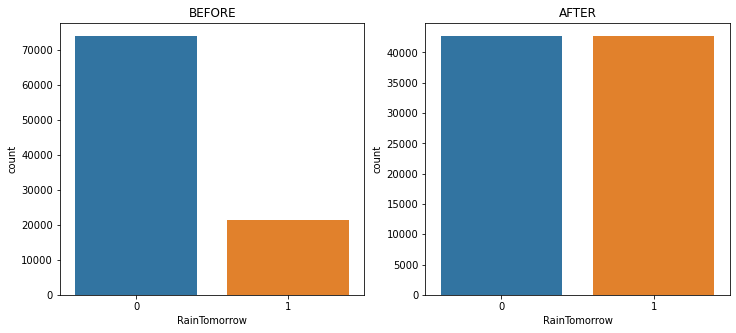

In [52]:
print("The Distribution of classes in the trainig set before and after resampling: ")

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(y_train)
plt.title("BEFORE")

plt.subplot(1,2,2)
sns.countplot(y_train_comb)
plt.title("AFTER")

plt.show()

No. of observations decreased because of the UnderSampling

After Using Combination of Oversampling & Undersampling: 

Precision: 0.5180
Recall:    0.7695
F1 Score:  0.6192


CONFUSION MATRIX:

[[28876  7531]
 [ 2424  8093]]


CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.92      0.79      0.85     36407
           1       0.52      0.77      0.62     10517

    accuracy                           0.79     46924
   macro avg       0.72      0.78      0.74     46924
weighted avg       0.83      0.79      0.80     46924



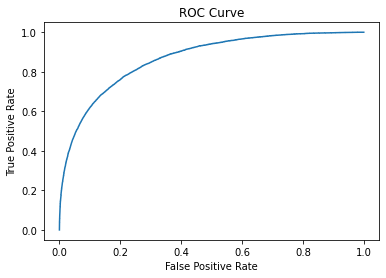

AUC Score: 0.8669


In [53]:
print("After Using Combination of Oversampling & Undersampling: \n")
log_comb = fit_model(LogisticRegression(penalty = 'none'),X_train_comb,y_train_comb,X_test,y_test)

* On comparing this model with our base model, we can see a significant increase in the F1 score (from 0.59 to 0.62)


* For class 1, the recall increased from 0.4960 to 0.7695 but the precision fell heavily from 0.7318 to 0.5180 which was expected as we have resampled the dataset because as we resample the dataset, the model is presented with more instances of minority class, therefore it is more likely that the model will optimise itself to recognise minority class instances.


### 2) SMOTE

In [54]:
smote = SMOTE()

In [40]:
X_train_sm,y_train_sm = smote.fit_resample(X_train,y_train)

The Distribution of classes in the trainig set before and after resampling: 


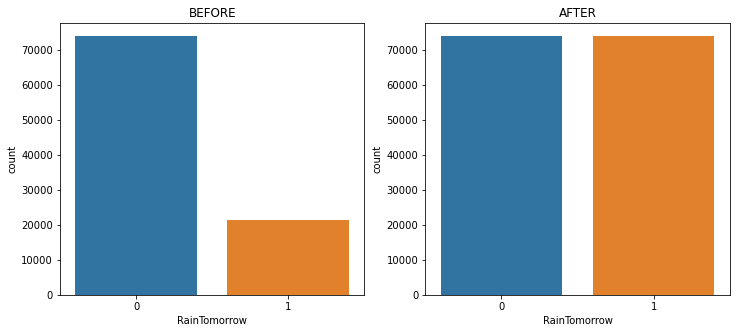

In [41]:
print("The Distribution of classes in the trainig set before and after resampling: ")

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(y_train)
plt.title("BEFORE")

plt.subplot(1,2,2)
sns.countplot(y_train_sm)
plt.title("AFTER")

plt.show()

After SMOTE Resampling: 

Precision: 0.5210
Recall:    0.7643
F1 Score:  0.6196


CONFUSION MATRIX:

[[29018  7389]
 [ 2479  8038]]


CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.92      0.80      0.85     36407
           1       0.52      0.76      0.62     10517

    accuracy                           0.79     46924
   macro avg       0.72      0.78      0.74     46924
weighted avg       0.83      0.79      0.80     46924



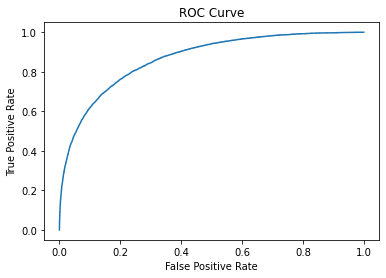

AUC Score: 0.8664


In [42]:
print("After SMOTE Resampling: \n")
log_smote = fit_model(LogisticRegression(penalty = 'none'),X_train_sm,y_train_sm,X_test,y_test)

* For class 1, we can see a very slight increase precision and and a little decrease in recall on comparing this model (Trained on SMOTE resampled data) with the previous model.


* The F1 score remained the same (0.62).


* We can see that both the resampling technique has definitely improved our model as compared with the base model.

## Feature Selection

### 1) Recursive Feature Elimination

In [55]:
from sklearn.feature_selection import RFE
rfe = RFE(LogisticRegression(penalty = 'none'))

In [56]:
X_train_rfe = rfe.fit_transform(X_train,y_train)
X_test_rfe = rfe.transform(X_test)

In [57]:
print("No. of features before appling RFE: ",X_train.shape[1])
print("No. of features after appling RFE: ",rfe.n_features_)

No. of features before appling RFE:  73
No. of features after appling RFE:  36


In [58]:
selected_features = np.ravel(np.where(rfe.support_))

print("The Selected Features are: \n")
for i in selected_features:
    print(features[i])

The Selected Features are: 

MinTemp
MaxTemp
Rainfall
Evaporation
Sunshine
WindGustSpeed
WindSpeed9am
WindSpeed3pm
Humidity3pm
Pressure3pm
Cloud3pm
Temp3pm
RainToday
Month_Sin
Month_Cos
WindDir3pm_cos
Location_Albany
Location_Ballarat
Location_Cairns
Location_CoffsHarbour
Location_Darwin
Location_GoldCoast
Location_Hobart
Location_Katherine
Location_Launceston
Location_MelbourneAirport
Location_MountGinini
Location_Newcastle
Location_Nhil
Location_NorahHead
Location_NorfolkIsland
Location_Sale
Location_SydneyAirport
Location_Townsville
Location_Wollongong
Location_Woomera


__*Applying SMOTE Resampling on the new training set with the extracted features and fitting a model on it.*__

In [59]:
X_train_sm_rfe,y_train_sm_rfe = smote.fit_resample(X_train_rfe,y_train)

SMOTE Resampling on Extracted Features: 

Precision: 0.5175
Recall:    0.7654
F1 Score:  0.6175


CONFUSION MATRIX:

[[28901  7506]
 [ 2467  8050]]


CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.92      0.79      0.85     36407
           1       0.52      0.77      0.62     10517

    accuracy                           0.79     46924
   macro avg       0.72      0.78      0.74     46924
weighted avg       0.83      0.79      0.80     46924



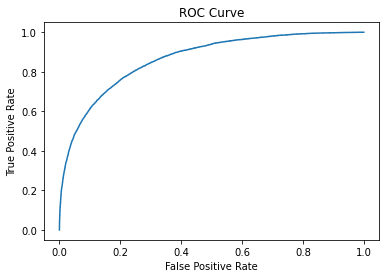

AUC Score: 0.8648


In [60]:
print("SMOTE Resampling on Extracted Features: \n")
log_smote_rfe = fit_model(LogisticRegression(penalty = 'none'),X_train_sm_rfe,y_train_sm_rfe,X_test_rfe,y_test)

__We are getting same results even with half of the features.__

In [76]:
extracted = []

for i in selected_features:
    extracted.append(features[i])

In [77]:
smote_rfe_coeff = np.ravel(log_smote_rfe.coef_)

coeff_rfe = pd.DataFrame(columns = ['Features','Smote_Coeff'])

for (i,j) in zip(extracted,smote_rfe_coeff):
    coeff_rfe = coeff_rfe.append({'Features':i,'Smote_Coeff':j}, ignore_index = True)

In [78]:
coeff_rfe = coeff_rfe.set_index(coeff_rfe['Features'])
coeff_rfe.drop('Features', axis = 1, inplace = True)
oeff_rfe = coeff_rfe.sort_values(by = 'Smote_Coeff',ascending = False)

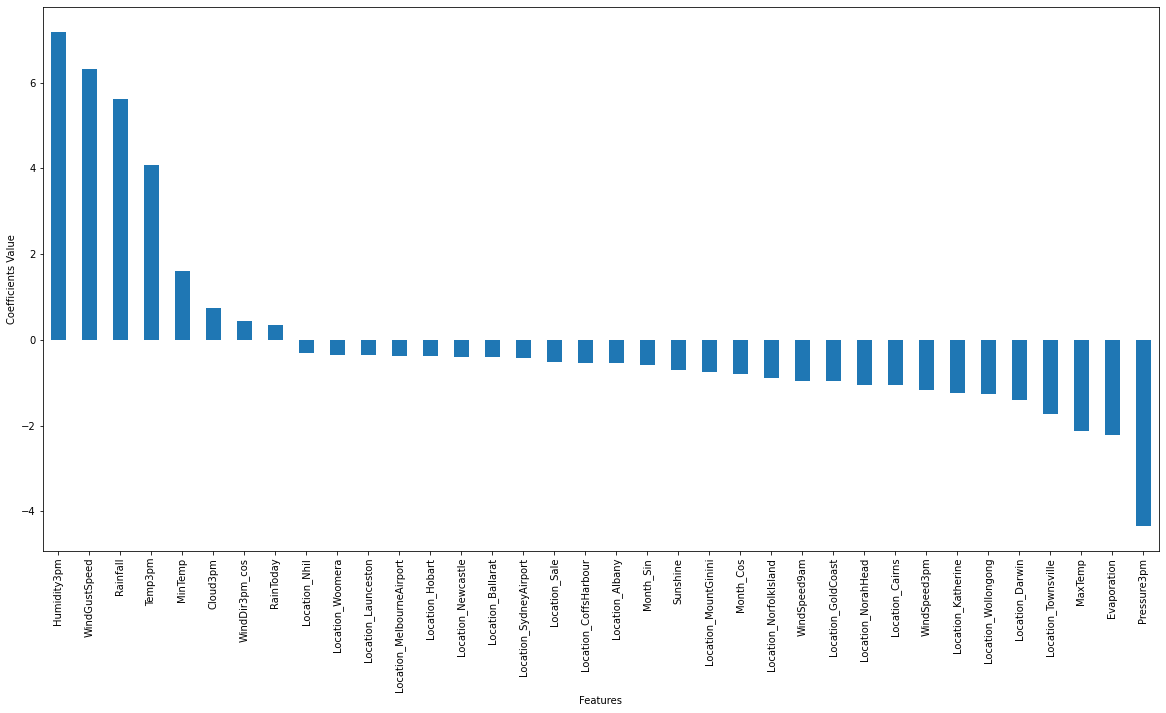

In [79]:
coeff_rfe['Smote_Coeff'].sort_values(ascending = False).plot(kind = 'bar',figsize = (20,10))
plt.ylabel("Coefficients Value")
plt.show()

For checking the significance of these selected features, we will apply Logit Model from the statsmodels library.

In [80]:
logit_rfe = sm.Logit(y_train_sm_rfe, sm.add_constant(X_train_sm_rfe)).fit()

Optimization terminated successfully.
         Current function value: 0.454669
         Iterations 7


In [81]:
logit_rfe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           RainTomorrow   No. Observations:               147818
Model:                          Logit   Df Residuals:                   147781
Method:                           MLE   Df Model:                           36
Date:                Thu, 26 Aug 2021   Pseudo R-squ.:                  0.3441
Time:                        16:51:24   Log-Likelihood:                -67208.
converged:                       True   LL-Null:                   -1.0246e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.1345      0.103    -40.159      0.000      -4.336      -3.933
x1             1.5979      0.118     13.587      0.000       1.367       1.828
x2            -2.1561      0.300     -7.183      0.000      -2.744      -1.568
x3             5.7945      0.475     12.210      0.000       4.864       6.725
x4            -1.9085      0.288     -6.625      0.000      -2.473      -1.344
x5            -0.7074      0.028    -24.925      0.000      -0.763      -0.652
x6             6.2833      0.103     61.239      0.000       6.082       6.484
x7            -0.8750      0.140     -6.234      0.000      -1.150      -0.600
x8            -1.1706      0.096    -12.238      0.000      -1.358      -0.983
x9             7.1974      0.071    101.664      0.000       7.059       7.336
x10           -4.3497      0.075    -57.629      0.000      -4.498      -4.202
x11            0.7331      0.022     32.736      0.000       0.689       0.777
x12            4.1634      0.332     12.551      0.000       3.513       4.814
x13            0.3404      0.020     17.247      0.000       0.302       0.379
x14           -0.5801      0.025    -23.496      0.000      -0.629      -0.532
x15           -0.7974      0.028    -28.287      0.000      -0.853      -0.742
x16            0.4299      0.022     19.736      0.000       0.387       0.473
x17           -0.5322      0.041    -12.836      0.000      -0.613      -0.451
x18           -0.4126      0.050     -8.171      0.000      -0.512      -0.314
x19           -1.0580      0.048    -22.085      0.000      -1.152      -0.964
x20           -0.5310      0.045    -11.774      0.000      -0.619      -0.443
x21           -1.4094      0.051    -27.390      0.000      -1.510      -1.309
x22           -0.9691      0.047    -20.683      0.000      -1.061      -0.877
x23           -0.3794      0.046     -8.214      0.000      -0.470      -0.289
x24           -1.2373      0.071    -17.390      0.000      -1.377      -1.098
x25           -0.3515      0.048     -7.269      0.000      -0.446      -0.257
x26           -0.3585      0.049     -7.347      0.000      -0.454      -0.263
x27           -0.7502      0.053    -14.035      0.000      -0.855      -0.645
x28           -0.3921      0.045     -8.803      0.000      -0.479      -0.305
x29           -0.2960      0.074     -4.012      0.000      -0.441      -0.151
x30           -1.0455      0.045    -23.318      0.000      -1.133      -0.958
x31           -0.8887      0.046    -19.178      0.000      -0.980      -0.798
x32           -0.5140      0.048    -10.762      0.000      -0.608      -0.420
x33           -0.4352      0.047     -9.297      0.000      -0.527      -0.343
x34           -1.7372      0.052    -33.246      0.000      -1.840      -1.635
x35           -1.2623      0.045    -27.845      0.000      -1.351      -1.173
x36           -0.3567      0.071     -4.990      0.000      -0.497      -0.217
==============================================================================
""

From the above summary table we can see that the P-value for each feature is less than 0.05. Hence all the selected features by Recrusive feature elimination method are statistically significant predictors of our target feature.

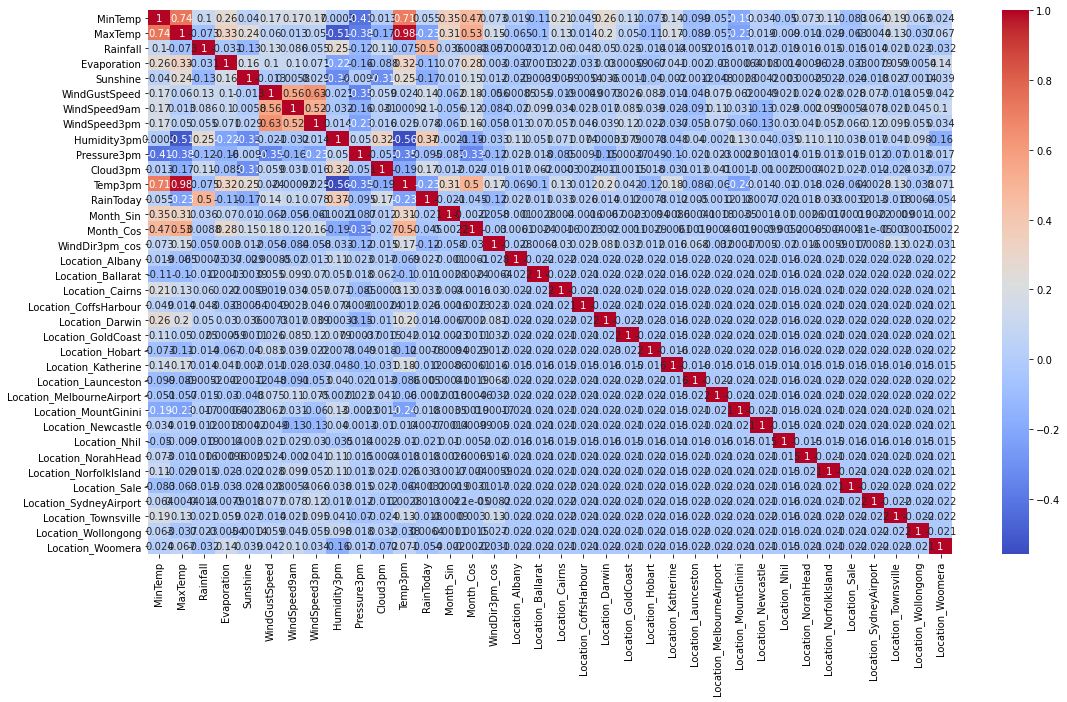

In [82]:
plt.figure(figsize = (18,10))
sns.heatmap(X_dummies[extracted].corr(), annot = True, cmap = 'coolwarm')
plt.show()

In [83]:
extracted.remove('Temp3pm')

In [70]:
X_train_new = np.delete(X_train_sm_rfe, 11, axis = 1 )
X_test_new = np.delete(X_test_rfe, 11, axis = 1 )

Precision: 0.5185
Recall:    0.7650
F1 Score:  0.6181


CONFUSION MATRIX:

[[28936  7471]
 [ 2472  8045]]


CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.92      0.79      0.85     36407
           1       0.52      0.76      0.62     10517

    accuracy                           0.79     46924
   macro avg       0.72      0.78      0.74     46924
weighted avg       0.83      0.79      0.80     46924



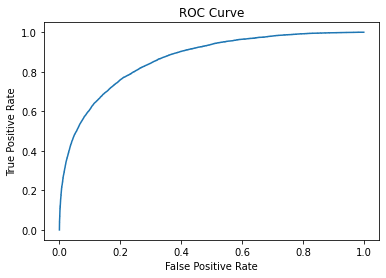

AUC Score: 0.8645


In [71]:
log_smote_new = fit_model(LogisticRegression(penalty = 'none'),X_train_new,y_train_sm_rfe,X_test_new,y_test)

In [72]:
smote_rfe_coeff = np.ravel(log_smote_new.coef_)

coeff_rfe = pd.DataFrame(columns = ['Features','Smote_Coeff'])

for (i,j) in zip(extracted,smote_rfe_coeff):
    coeff_rfe = coeff_rfe.append({'Features':i,'Smote_Coeff':j}, ignore_index = True)

In [73]:
coeff_rfe = coeff_rfe.set_index(coeff_rfe['Features'])
coeff_rfe.drop('Features', axis = 1, inplace = True)
oeff_rfe = coeff_rfe.sort_values(by = 'Smote_Coeff',ascending = False)

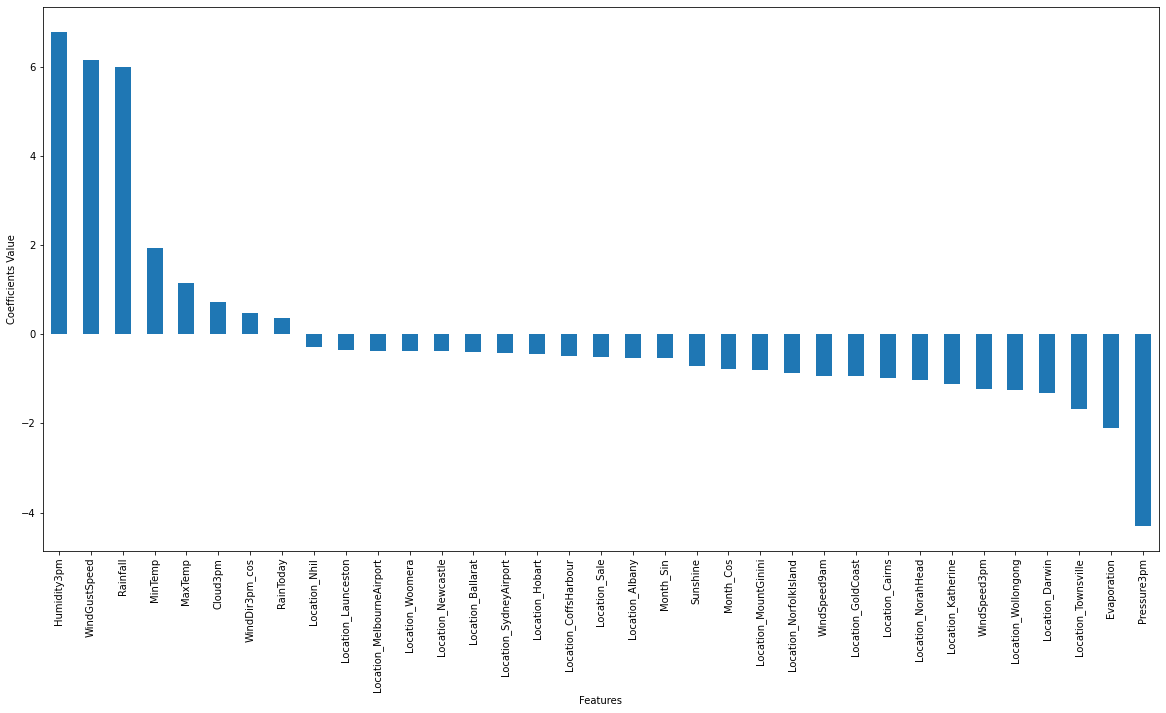

In [74]:
coeff_rfe['Smote_Coeff'].sort_values(ascending = False).plot(kind = 'bar',figsize = (20,10))
plt.ylabel("Coefficients Value")
plt.show()

## HYPERTUNING THE PARAMETERS

In [66]:
X_train_gcv = np.delete(X_train_rfe,11,axis = 1)
X_test_gcv = np.delete(X_test_rfe , 11 , axis = 1)

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
pipe_smote = Pipeline([('sm',smote),('log',LogisticRegression())])
params = {'sm__sampling_strategy':(0.5,0.75,1)
         ,'log__C':(0.01,0.1,1,100)}
gcv_smote = GridSearchCV(pipe_smote, param_grid = params, cv = 3, scoring = 'f1', n_jobs = -1)

In [69]:
gcv_smote.fit(X_train_gcv, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('sm', SMOTE()),
                                       ('log', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'log__C': (0.01, 0.1, 1, 100),
                         'sm__sampling_strategy': (0.5, 0.75, 1)},
             scoring='f1')

In [71]:
gcv_smote.best_estimator_

Pipeline(steps=[('sm', SMOTE(sampling_strategy=0.75)),
                ('log', LogisticRegression(C=100))])

In [72]:
smote_gcv = SMOTE(sampling_strategy = 0.75)

In [73]:
X_train_new,y_train_new = smote_gcv.fit_resample(X_train_gcv,y_train)

The Distribution of classes in the trainig set before and after resampling: 


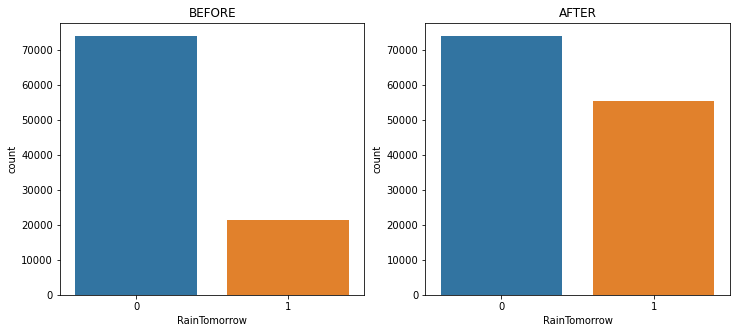

In [74]:
print("The Distribution of classes in the trainig set before and after resampling: ")

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(y_train)
plt.title("BEFORE")

plt.subplot(1,2,2)
sns.countplot(y_train_new)
plt.title("AFTER")

plt.show()

Precision: 0.5603
Recall:    0.7069
F1 Score:  0.6251


CONFUSION MATRIX:

[[30574  5833]
 [ 3083  7434]]


CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.91      0.84      0.87     36407
           1       0.56      0.71      0.63     10517

    accuracy                           0.81     46924
   macro avg       0.73      0.77      0.75     46924
weighted avg       0.83      0.81      0.82     46924



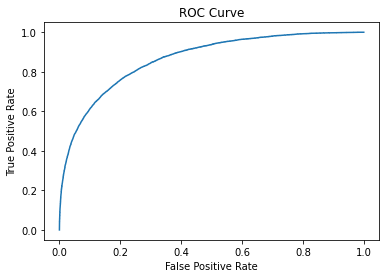

AUC Score: 0.8645


In [78]:
log_gcv = fit_model(LogisticRegression(C=100),X_train_new,y_train_new,X_test_gcv,y_test)

In [79]:
coeff_gcv = pd.DataFrame()

for (i,j) in zip(extracted,list(np.ravel(log_gcv.coef_))):
    coeff_gcv = coeff_gcv.append({'Features':i,'Log_gcv_coeff':j}, ignore_index = True)

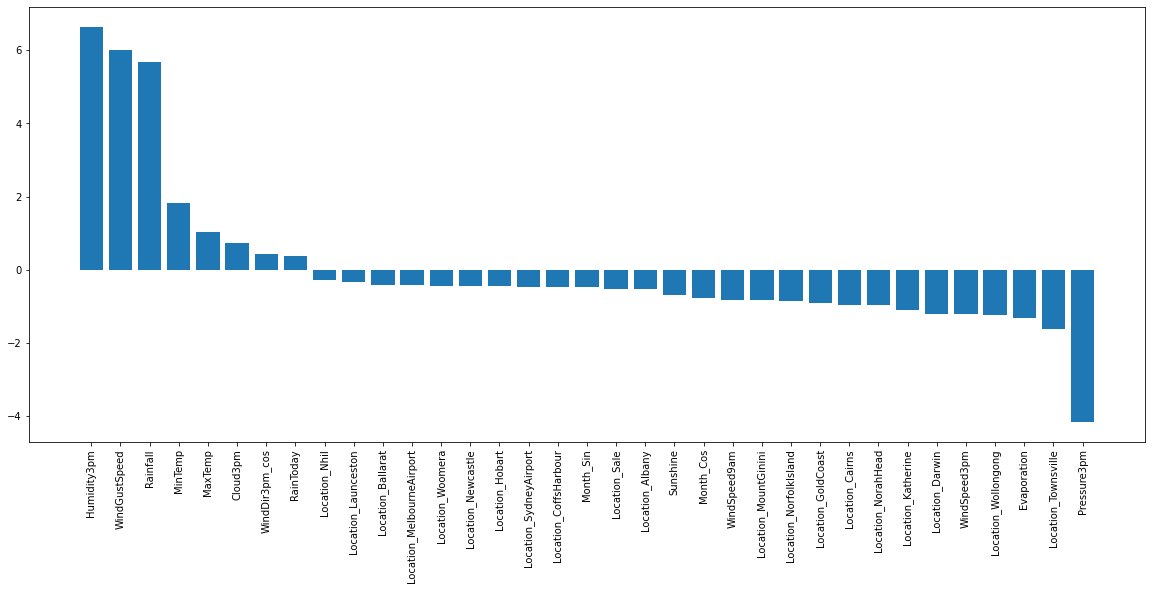

In [80]:
x = coeff_gcv.sort_values(by='Log_gcv_coeff',ascending=False)

plt.figure(figsize=(20,8))
plt.bar(height = x['Log_gcv_coeff'], x = x['Features'])
plt.xticks(rotation=90)
plt.show()

__*For Hyptertuned Model on SMOTE Resampling Technique*__

* The F1 score increased from 0.62 to 0.63 after hypertuning the parameters of the model.

* The best parameter for sampling strategy in SMOTE selected by Hyptertuning is 0.75.

## CONCLUSIONS:

* The F1 score of the models increased after we applied the resampling techniques.

* The F1 score of the models fitted on both the Resampling technique is same.

* We are achieving same results even with half of the no. of features after applying Recursive Feature Elimination.

* The models showed slight imporvement in their scores after hyptertuning their parameters.

* The SMOTE Hypertuned Model is giving out best result on comparing it with the other models.